# Dataset Normalization

Load dataset

In [1]:
import torch

# load test input/output data
inputs = torch.load("data/inputs.pt")
outputs = torch.load("data/outputs.pt")

inputs.shape, outputs.shape

(torch.Size([112, 1, 21, 21]), torch.Size([112, 2, 21, 21]))

Inspect one input/output sample

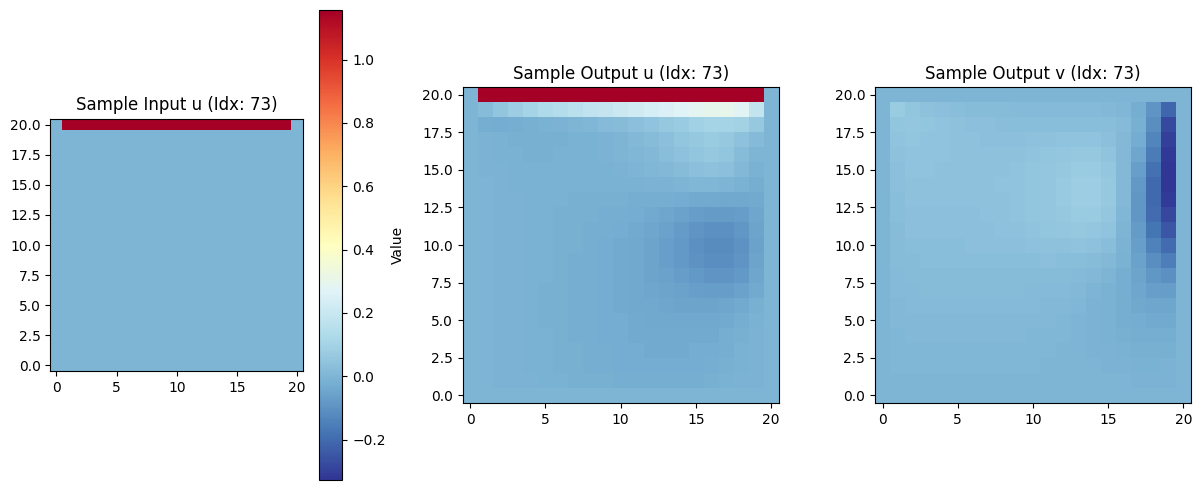

In [2]:
from plotting import plot_data_samples

plot_data_samples(inputs, outputs)


From the input data, we extract the min and max values of the velocity field.

In [3]:
in_u_max = inputs.max()
in_u_min = inputs.min()

From the output data (labels), we extract the min and max values of the velocity fields

In [4]:
out_u_min = outputs[:, 0, :, :].min()
out_u_max = outputs[:, 0, :, :].max()
out_v_min = outputs[:, 1, :, :].min()
out_v_max = outputs[:, 1, :, :].max()

Write values to yaml file

In [5]:
in_u_max.item()

1.499

In [6]:
import yaml

with open("./data/min_max.yaml", "w") as f:
    yaml.dump({
        "inputs": {
            "u": {
                "min": in_u_min.item(),
                "max": in_u_max.item(),
            },
        },
        "labels": {
            "u": {
                "min": out_u_min.item(),
                "max": out_u_max.item(),
            },
            "v": {
                "min": out_v_min.item(),
                "max": out_v_max.item(),
            },
        }
    }, f)

Apply normalization to the dataset

In [7]:
# Normalize inputs with centered scaling
inputs_normalized = (inputs - in_u_min) / (in_u_max - in_u_min)

In [8]:
outputs_normalized = outputs.clone()

# normalize the outputs, each channel separately
outputs_normalized[:, 0] = (outputs[:, 0] - out_u_min) / (out_u_max - out_u_min)
outputs_normalized[:, 1] = (outputs[:, 1] - out_v_min) / (out_v_max - out_v_min)